## Data Visualization with R

### Install required packages

In [6]:
install.packages("ggplot2")
install.packages("ggdendro")
install.packages("BiocManager")
BiocManager::install("ComplexHeatmap")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'ComplexHeatmap'

also installing the dependencies ‘rjson’, ‘BiocGenerics’, ‘S4Vectors’, ‘circlize’, ‘GetoptLong’, ‘clue’, ‘GlobalOptions’, ‘IRanges’, ‘matrixStats’, ‘doParallel’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'curl', 'data.table', 'e1071', 'evaluate',
  'jsonlite', 'MASS', 'Matrix', 'nlme', 'openssl', 'pbdZMQ', 'ps', 'ragg',
  'randomForest', 'timeDate', 'tinytex'



In [1]:
setwd('/home/ec2-user/SageMaker/NIGMS-Sandbox-Repository-MeRIP-UH')
getwd()

[1] "/home/ec2-user/SageMaker/NIGMS-Sandbox-Repository-MeRIP-UH"

### Make volcano plots

In [1]:
library(ggplot2)

# Read in the toptable
toptable = read.table("viz_data/Toptable_VolcanoPlot.txt")

# Declare significance thresholds
sig = 0.05
FC = 0.6

# Add a significance column to the dataframe
# Do this as a factor where we define the levels as Up, Down, and Not_Sig
# This allows us to easily specify the color of the points for each category
toptable$Significance = factor(ifelse(toptable$logFC > FC & toptable$P.Value < sig,"Up",
                               ifelse(toptable$logFC < -FC & toptable$P.Value < sig,"Down", "Not_Sig")),
                              levels=c("Up","Down","Not_Sig"))

# Add color to the plot based on the values above with the scale_color_manual scale setting
ggplot(data = toptable, aes(x=logFC, y=-log10(adj.P.Val),col=Significance)) + 
geom_point() + 
scale_color_manual(values=c("red","blue","grey"))

Warning message in file(file, "rt"):
“cannot open file 'viz_data/Toptable_VolcanoPlot.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


### Make heatmap with the complexHeatmap package

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



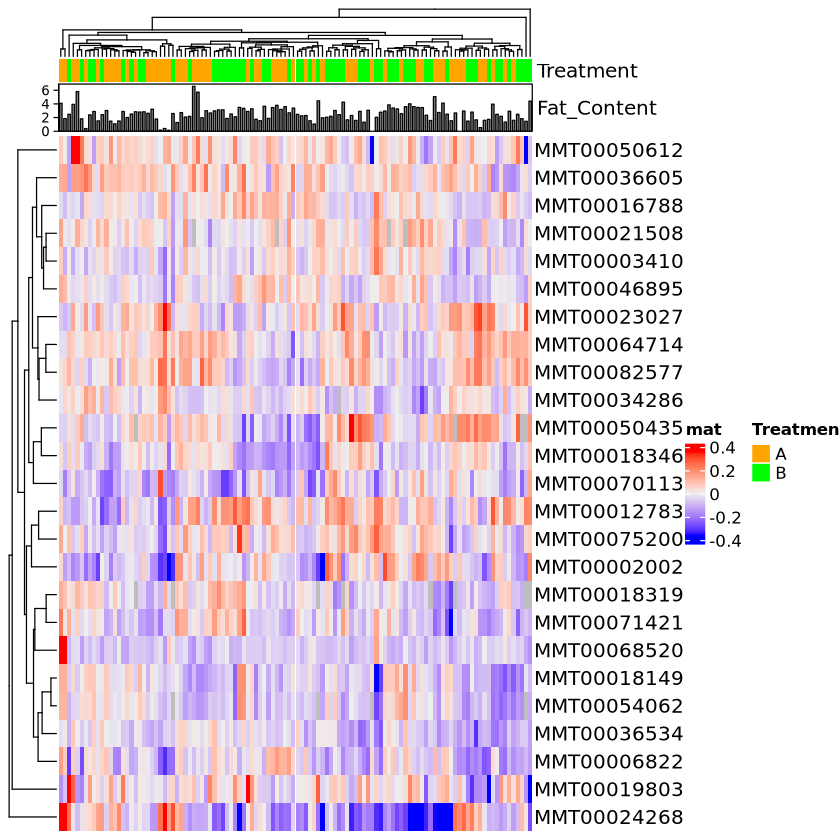

In [7]:
suppressPackageStartupMessages(library(ComplexHeatmap)) #suppresses certain package messages when loading

# First, read in the expression data
counts = read.csv("viz_data/heatmap_matrix.csv")

# Next, read in the sample metadata
traits = read.csv("viz_data/heatmap_traits.csv")

# Now convert the counts data frame to a matrix since ComplexHeatmap only works on matrices
# We will randomly select 25 genes to plot. 
genes = sample(nrow(counts), 25)
mat = as.matrix(counts[genes,-1])

column_ha = HeatmapAnnotation(Treatment = traits$Treatment, Fat_Content = anno_barplot(traits$ab_fat),
                             col = list(Treatment = c("A" = "orange", "B" = "green")))

Heatmap(mat, name = "mat", show_column_names = FALSE, top_annotation = column_ha) + 
    rowAnnotation(gene = anno_text(counts[,1][genes], just = "center", 
    location = unit(0.5, "npc"), show_name = FALSE), 
    annotation_name_rot = 0)

### Make dendrogram with ggdendro package

In [8]:
library(ggplot2)
library(ggdendro)

# Load a dataset. We will use the US Arrests dataset that comes with R
data("USArrests")
  
# Let's look at the first few rows to see how the dataset is structured
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


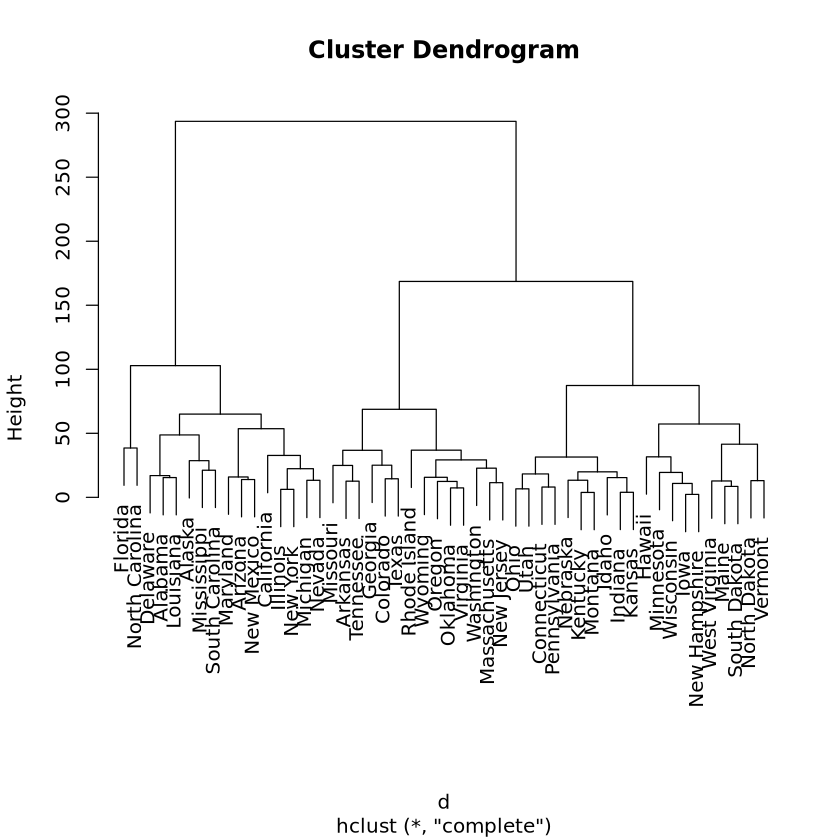

In [11]:
# Create a distance matrix
d = dist(USArrests)
# Create a hierarchical clustering object from the distance matrix
hc = hclust(d)
# Print the distance matrix
# d
plot(hc)

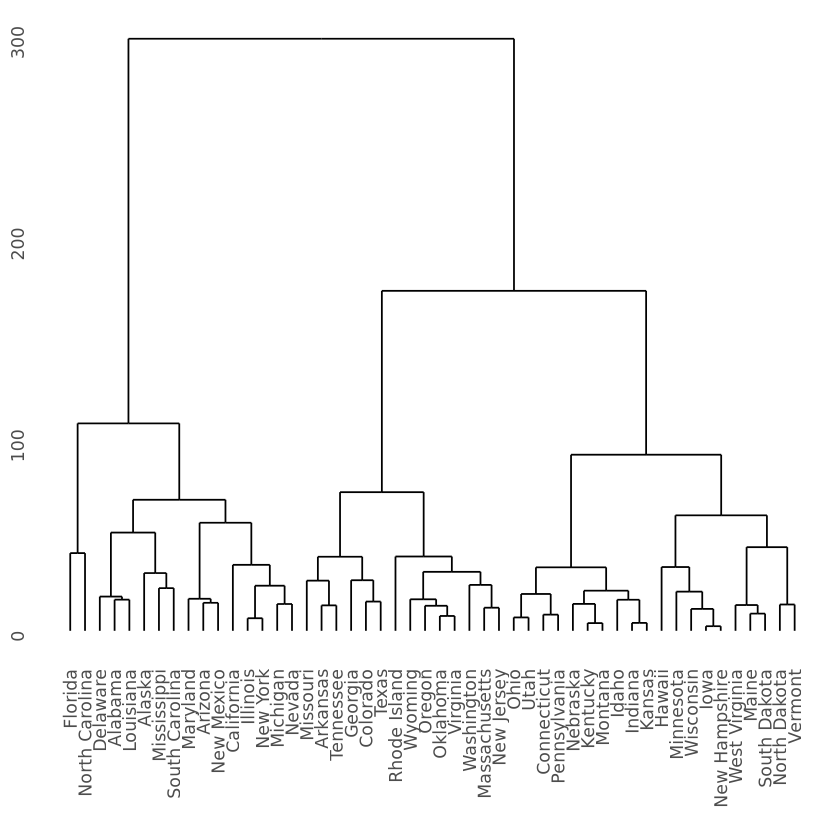

In [12]:
# Now let's plot the dendrogram and see how it looks. We are also using the element_text feature to incrase the font size
ggdendrogram(hc, rotate= FALSE) + theme(text = element_text(size = 13))